In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import TSNE
from itertools import cycle, islice

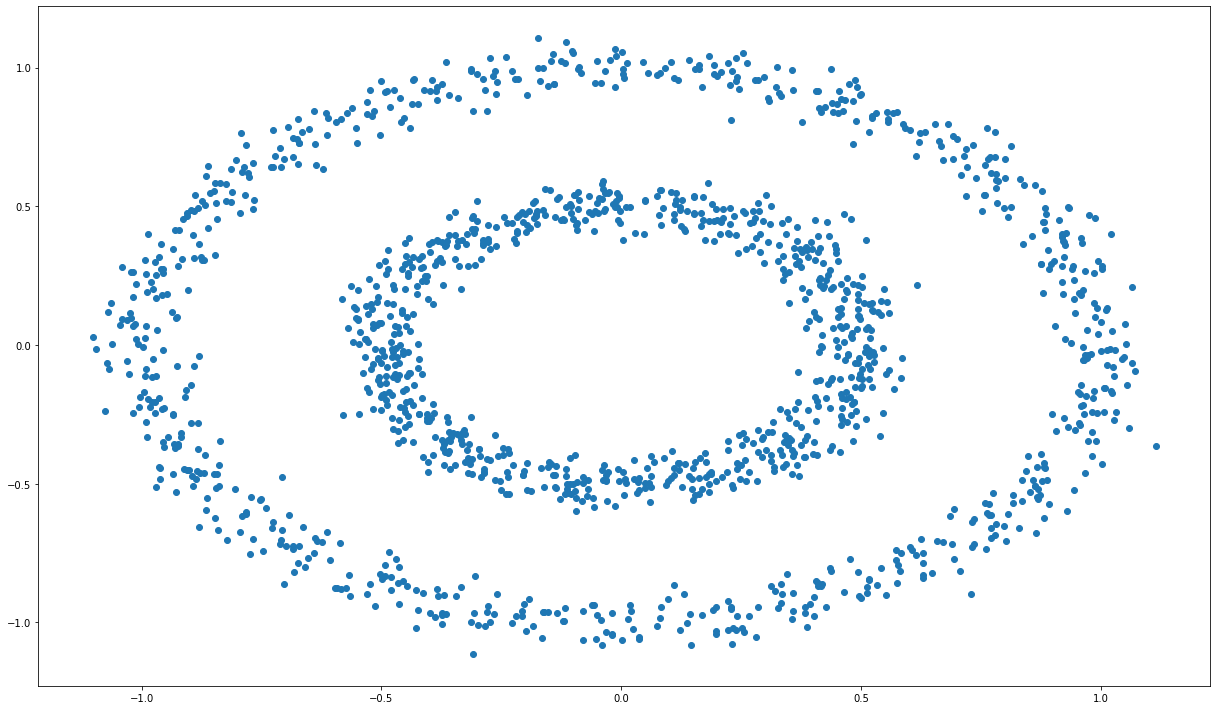

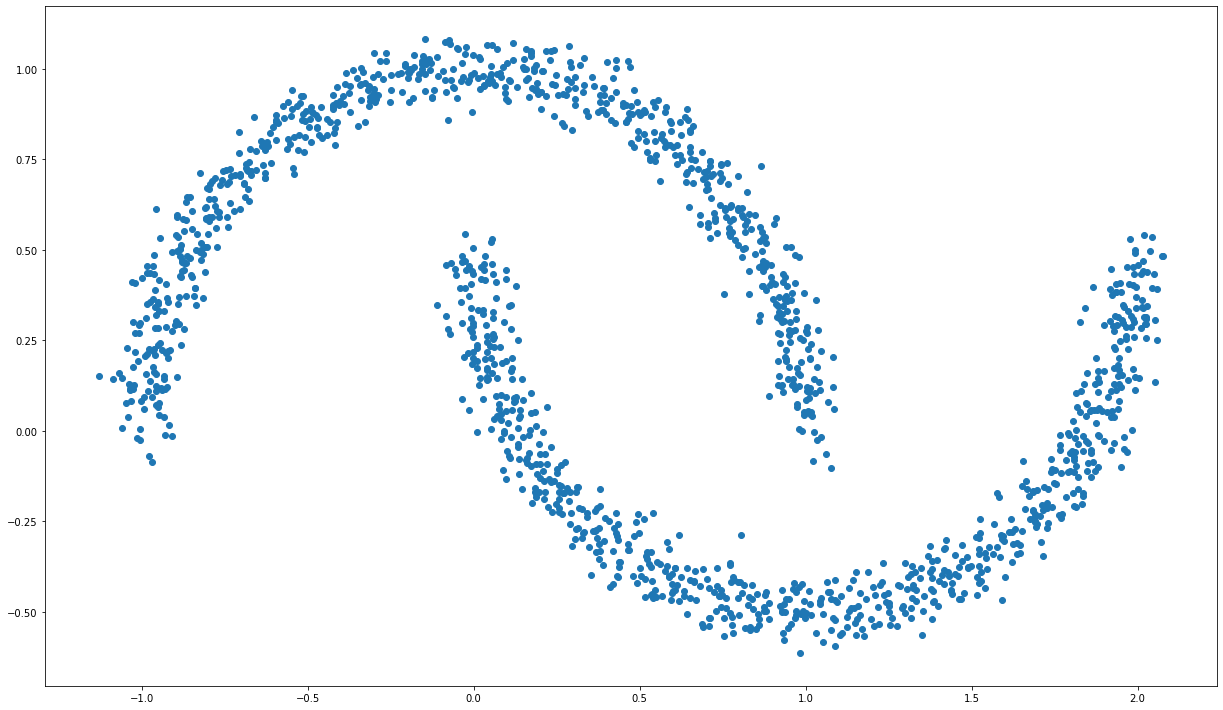

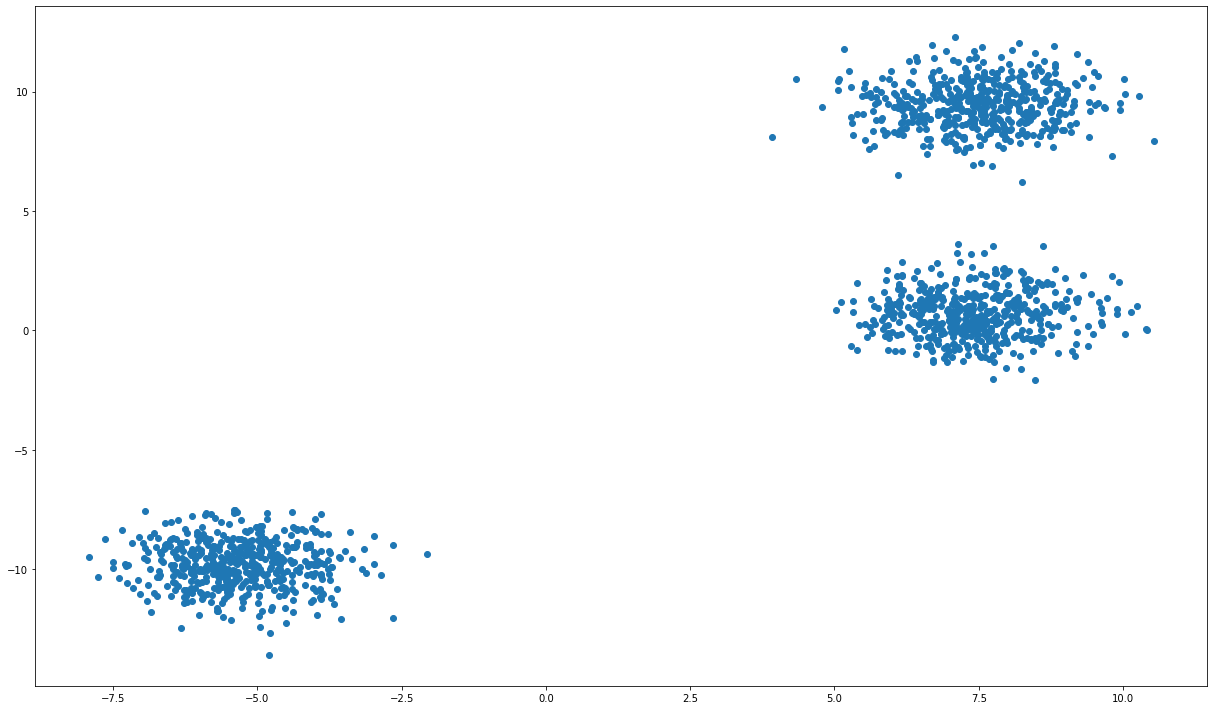

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

#putting all the datasets in a list with their respective parameters, only the number of clusters will be needed though
dataset = [
    (noisy_circles, {'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'n_clusters': 2}),
    (blobs, {   'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                })]

#plotting the datasets
for data, params in dataset:

    plt.figure(figsize=(9 * 2 + 3, 12.5))
    plt.scatter(data[0][:, 0], data[0][:, 1])

Visualizing the different performance of the different linkages

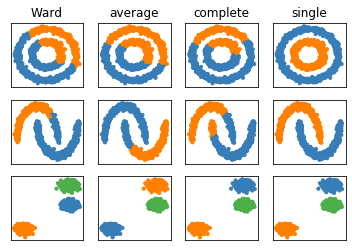

In [3]:
plot_num=1
for i_dataset, (data, params) in enumerate(dataset):
    #defining agglomerative clustering with different linkages
    ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='ward')
    average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock",
            n_clusters=params['n_clusters'])
    complete = cluster.AgglomerativeClustering(
            linkage="complete", affinity="cityblock",
            n_clusters=params['n_clusters'])
    single = cluster.AgglomerativeClustering(
            linkage="single", affinity="cityblock",
            n_clusters=params['n_clusters'])
    #putting the different models in a tuple to iterate over
    clustering_algorithms = (('Ward', ward),
                             ('average', average_linkage),
                             ('complete', complete),
                             ('single', single))
    #iterating over the clustering algorithms
    for name, algorithm in clustering_algorithms:
        #predicting the clustering
        y_pred = algorithm.fit_predict(data[0])
        #setting different colors to choose from when plotting the clustering
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        l2_plot = plt.subplot(3, 4, plot_num)
        plt.scatter(data[0][:, 0], data[0][:, 1], s=10, color=colors[y_pred])
        if i_dataset == 0:
            plt.title(name)

        plt.xticks(())
        plt.yticks(())
        plot_num +=1



This looks already alright, especially the single linkage performs really well and can correctly cluster all the datasets.

Now trying to do some hyperparameter tuning by giving a connectivity matrix derived from the data through the kneighbours_graph


C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\cluster\_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\cluster\_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\cluster\_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1

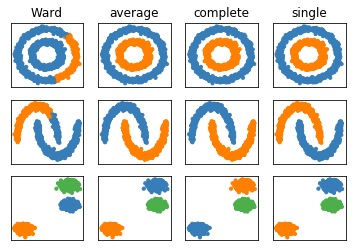

In [4]:
#this is basically the same code as before except for the added kneighbours connectivity
plot_num= 1
for i_dataset, (data, params) in enumerate(dataset):

    connectivity = kneighbors_graph(data[0], n_neighbors=10)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)


    ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='ward', connectivity=connectivity)
    average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
    complete = cluster.AgglomerativeClustering(
            linkage="complete", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
    single = cluster.AgglomerativeClustering(
            linkage="single", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)

    clustering_algorithms = (('Ward', ward),
                             ('average', average_linkage),
                             ('complete', complete),
                             ('single', single))

    for j, (name, algorithm) in enumerate(clustering_algorithms):

        y_pred = algorithm.fit_predict(data[0])

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        l2_plot = plt.subplot(3, 4, plot_num)
        plt.scatter(data[0][:, 0], data[0][:, 1], s=10, color=colors[y_pred])
        if i_dataset == 0:
            plt.title(name)

        plt.xticks(())
        plt.yticks(())

        plot_num +=1


At least for complete and average linkage this is better, ward can't really be improved.
Let's compare with T-SNE and k-means...
First the clustering is done without T-SNE transformation and then both are used together.

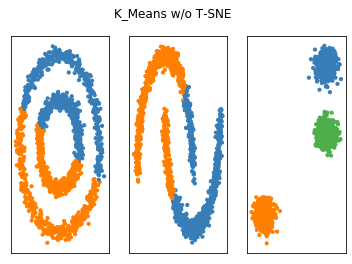

In [5]:
for i_dataset, (data, params) in enumerate(dataset):


    kmeans= cluster.KMeans(n_clusters= params['n_clusters'], init='k-means++', algorithm='elkan')
    kmeans_pred = kmeans.fit_predict(data[0])



    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(kmeans_pred) + 1))))
    l2_plot = plt.subplot(1, 3, i_dataset + 1)
    plt.scatter(data[0][:, 0], data[0][:, 1], s=10, color=colors[kmeans_pred])
    plt.suptitle('K_Means w/o T-SNE')
    plt.xticks(())
    plt.yticks(())

k means on its own is not really able to keep up with agglomerative clustering with the kneighbouring connectivity matrix

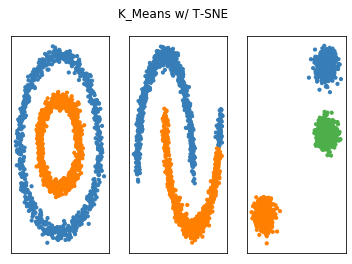

In [6]:
for i_dataset, (data, params) in enumerate(dataset):
    tsne = TSNE(n_components=params['n_clusters'])
    tsne_trafo=tsne.fit_transform(data[0])

    kmeans= cluster.KMeans(n_clusters= params['n_clusters'], init='k-means++', algorithm='elkan')
    kmeans_pred = kmeans.fit_predict(tsne_trafo)

   # fig = plt.figure

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(kmeans_pred) + 1))))
    l2_plot = plt.subplot(1, 3, i_dataset + 1)
    plt.scatter(data[0][:, 0], data[0][:, 1], s=10, color=colors[kmeans_pred])
    plt.suptitle('K_Means w/ T-SNE')
    plt.xticks(())
    plt.yticks(())





The performance for the circles can be improved with t-sne, but the moons are still not clustered correctly, also it takes a bit longer than the Agglomeration clustering.

